<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [7]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [10]:
# текст запроса
query_3_1 = f'''
SELECT COUNT(v.id) as Количество_вакансий FROM vacancies as v
'''

In [12]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\935955133.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,Количество_вакансий
0,49197


In [13]:
print('Количество вакансий составляет {}'.format(df['Количество_вакансий'].iloc[0]))

Количество вакансий составляет 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [17]:
# текст запроса
query_3_2 = f'''SELECT COUNT(e.id) as Количество_работодателей FROM employers as e'''

In [18]:
# результат запроса
df = pd.read_sql_query(query_3_2,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\1170978344.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2,connection)


,Количество_работодателей
0,23501


In [21]:
print('Количество работодателей составляет {}'.format(df['Количество_работодателей'].iloc[0]))

Количество работодателей составляет 23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [22]:
# текст запроса
query_3_3 = f'''SELECT COUNT(a.id) AS Количество_регионов FROM areas as a'''

In [23]:
# результат запроса
df = pd.read_sql_query(query_3_3,connection)
df.sample()

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\1048633773.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3,connection)


,Количество_регионов
0,1362


In [24]:
print('Количество регионов в данных составляет {}'.format(df['Количество_регионов'].iloc[0]))

Количество регионов в данных составляет 1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [25]:
# текст запроса
query_3_4 = f'''SELECT COUNT(i.id) AS Количество_сфер_деятельности FROM industries as i'''

In [26]:
# результат запроса
df = pd.read_sql_query(query_3_4,connection)
df.sample()

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\3517511609.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4,connection)


,Количество_сфер_деятельности
0,294


In [27]:
print('Количество сфер деятельности работодателей составляет {}'.format(df['Количество_сфер_деятельности'].iloc[0]))

Количество сфер деятельности работодателей составляет 294


***

# Выводы по предварительному анализу данных
- ***Количество работодателей меньше чем вакансий, поскольку одна и та же организация может искать соискателей по нескольким вакансиям.***
- ***Количество регионов обусловлено скорее всего наличием пригородов, а также городов, находящихся не в РФ***
- ***Одна сфера деятельности может содержать много вакансий***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [28]:
# текст запроса
query_4_1 = f'''
SELECT a.name AS Регионы,COUNT(v.area_id) AS Количество FROM vacancies as v
JOIN areas as a ON v.area_id = a.id
GROUP BY a.name
ORDER BY COUNT(v.id) DESC
LIMIT 5'''

In [29]:
# результат запроса
df = pd.read_sql_query(query_4_1,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\4132039579.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1,connection)


,Регионы,Количество
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [30]:
# текст запроса
query_4_2 = f'''SELECT COUNT(*) AS Количество FROM vacancies
WHERE salary_from is NOT NULL or salary_to IS NOT NULL
'''

In [31]:
# результат запроса
df = pd.read_sql_query(query_4_2,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\949731072.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2,connection)


,Количество
0,24073


In [32]:
print('Количество вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой - {}'.format(df['Количество'].iloc[0]))

Количество вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой - 24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [33]:
# текст запроса
query_4_3 = f'''SELECT ROUND(AVG(salary_from)) as Средняя_нижняя_граница, ROUND(AVG(salary_to)) AS Средняя_верхняя_граница FROM vacancies as v'''

In [34]:
#результат запроса
df = pd.read_sql_query(query_4_3,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\168935265.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3,connection)


,Средняя_нижняя_граница,Средняя_верхняя_граница
0,71065.0,110537.0


In [35]:
print('Среднее значение для нижней зарплатной вилки -{}, для верхней зарплатной вилки - {}'.format(df['Средняя_нижняя_граница'].iloc[0],df['Средняя_верхняя_граница'].iloc[0]))

Среднее значение для нижней зарплатной вилки -71065.0, для верхней зарплатной вилки - 110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [36]:
# текст запроса
query_4_4 = f'''SELECT schedule as Тип_рабочего_графика,employment as Тип_трудоустройства,count(v.id) as Количество FROM vacancies as v
GROUP BY 1,2
ORDER BY 3 DESC'''

In [38]:
# результат запроса
df = pd.read_sql_query(query_4_4,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\2166644490.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4,connection)


,Тип_рабочего_графика,Тип_трудоустройства,Количество
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


[Text(0.5, 1.0, 'График количества вакансий сочетаний типа графика и типа трудоустройства')]

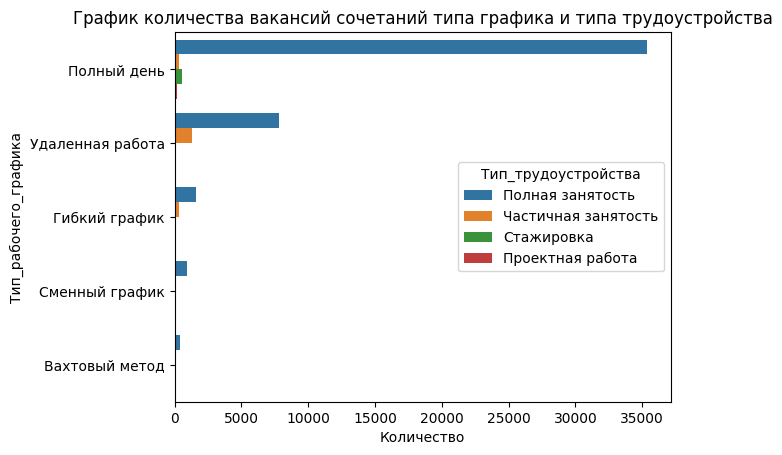

In [39]:
# По графику видно преобладающее большинство за сочетанием "Полный день - Полная занятость"
sns.barplot(df,y='Тип_рабочего_графика',x='Количество',hue='Тип_трудоустройства').set(title='График количества вакансий сочетаний типа графика и типа трудоустройства')

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [42]:
# текст запроса
query_4_5 = f'''SELECT experience,COUNT(v.id) as Количество FROM vacancies as v
GROUP BY 1
ORDER BY 2 ASC'''

In [43]:
# результат запроса
df = pd.read_sql_query(query_4_5,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\1722615915.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5,connection)


,experience,Количество
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


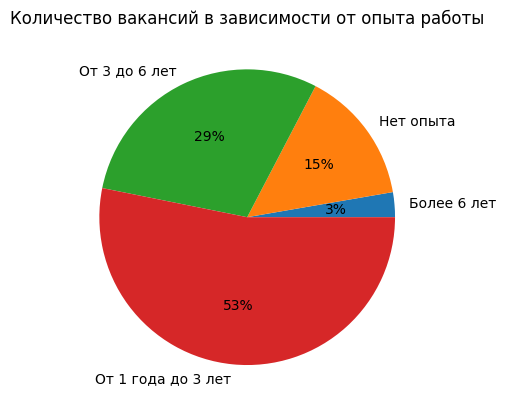

In [44]:
#По графику видно, что подавляющее большинство работодателей в поиске соискателей с опытом работы от 1 до 3 лет
plt.pie(data =df,x='Количество',  labels='experience',autopct='%.0f%%')
plt.title('Количество вакансий в зависимости от опыта работы')
plt.show()

***

# Выводы по детальному анализу вакансий
- ***Большая часть значений в колонках о зарплате являются пустыми, то есть за частую работодатели информацию о зарплатах не выкладывают***
- ***Средними значениями нижней границы и верехней границы являются 71065 и 110537 соответственно***
- ***Для большинства работодателей наиболее востребовано считается сочетание полной занятости и полный день***
- ***Большинству работодателям нужны соискатели с опытом работы от 1 до 3 лет*** 

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [53]:
# текст запроса
query_5_1 = f'''(SELECT e.name,COUNT(v.id) FROM employers AS e
JOIN vacancies as v ON e.id = v.employer_id
GROUP BY e.id
ORDER BY 2 DESC
LIMIT 1)
UNION
(SELECT e.name,COUNT(v.id) FROM employers AS e
JOIN vacancies as v ON e.id = v.employer_id
GROUP BY e.id
ORDER BY 2 DESC
OFFSET 4 LIMIT 1)
ORDER BY 2 DESC
'''

In [54]:
# результат запроса
df = pd.read_sql_query(query_5_1,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\1065406385.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1,connection)


,name,count
0,Яндекс,1933
1,Газпром нефть,331


In [55]:
print('По количеству вакансий на 1 первом месте находится - {}, на 5 -м месте - {}'.format(df['name'].iloc[0], df['name'].iloc[1]))

По количеству вакансий на 1 первом месте находится - Яндекс, на 5 -м месте -Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [57]:
# текст запроса
query_5_2 = f'''select a.name as Регион, COUNT(distinct e.id) AS Количество_работодателей, COUNT(distinct v.id) AS Количество_вакансий FROM areas as a
JOIN employers as e ON a.id = e.area
LEFT JOIN vacancies as v ON a.id = v.area_id
WHERE v.name is NULL
GROUP BY a.id
ORDER BY 2 DESC
'''

In [58]:
# результат запроса
df = pd.read_sql_query(query_5_2,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\3039681661.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2,connection)


,Регион,Количество_работодателей,Количество_вакансий
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
181,Витебская область,1,0
182,Ивацевичи,1,0
183,Дубровно,1,0
184,Буда-Кошелево,1,0


In [59]:
print('Среди регионов, в котором нет вакансий на 1 месте по количеству работодателей располагается - {}'.format(df['Регион'].iloc[0]))

Среди регионов, в котором нет вакансий на 1 месте по количеству работодателей располагается - Россия


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [61]:
# текст запроса
query_5_3 = f'''SELECT e.name AS Работодатель, COUNT(distinct v.area_id) AS Количество_регионов FROM employers as e
JOIN vacancies as v ON e.id = v.employer_id
GROUP BY e.id
ORDER BY 2 DESC'''


In [62]:
# результат запроса
df = pd.read_sql_query(query_5_3,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\2167157387.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3,connection)


,Работодатель,Количество_регионов
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14901,НПП Авиатрон,1
14902,Центр дистанционных торгов,1
14903,Городские Телекоммуникационные Системы,1
14904,"Введенский, Отель",1


Text(0.5, 1.0, 'График количество регионов публикуемых вакансий работодателями')

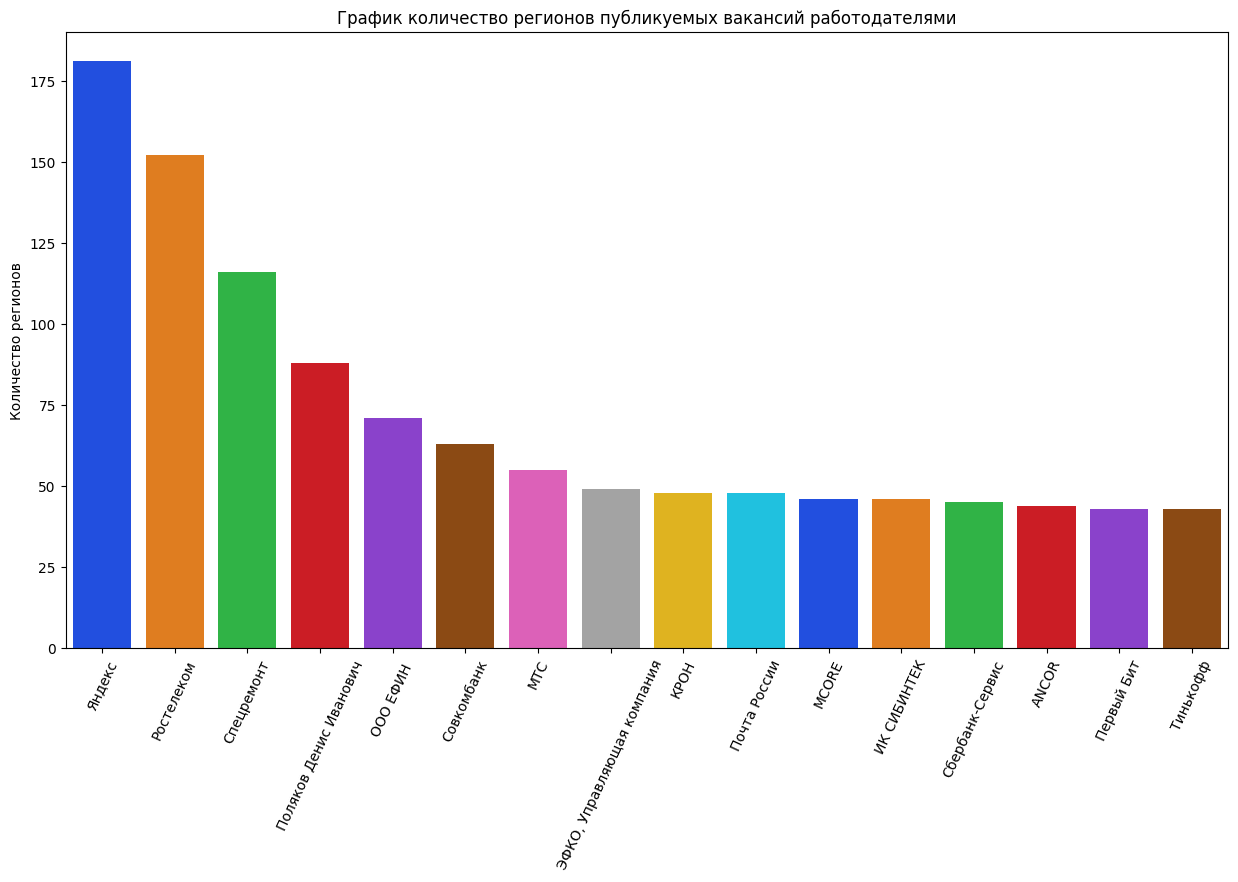

In [20]:
# По графику видно что среди работодателей по количеству регионов, в которых публикуются вакансии, являюются на 1- м месте - Яндекс, на 2-м - Ростелеком
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Работодатель', y = 'Количество_регионов',data = df.iloc[:16],palette='bright')
plt.xticks(rotation=65)
plt.xlabel('')
plt.ylabel('Количество регионов')
plt.title('График количества регионов публикуемых вакансий работодателями')

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [63]:
# текст запроса
query_5_4 = f'''SELECT COUNT(e.name) AS Количество_работодателей FROM employers as e 
LEFT JOIN employers_industries as e_i on e.id = e_i.employer_id
WHERE industry_id is NULL 
'''

In [64]:
# результат запроса
df = pd.read_sql_query(query_5_4,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\3553459310.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4,connection)


,Количество_работодателей
0,8419


In [65]:
print('Количество работодателей, у которых не указана сфера деятельности составляет {}'.format(df['Количество_работодателей'].iloc[0]))

Количество работодателей, у которых не указана сфера деятельности составляет 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [66]:
# текст запроса
query_5_5 = f'''SELECT e.name FROM employers as e 
JOIN employers_industries as e_i ON e.id = e_i.employer_id
GROUP BY e.id
HAVING COUNT(industry_id)=4
ORDER BY 1 ASC
OFFSET 2 LIMIT 1'''

In [67]:
# результат запроса
df = pd.read_sql_query(query_5_5,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\2182950375.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5,connection)


,name
0,2ГИС


In [68]:
print('Компанией, являющейся на третьем месте в в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности {}'.format(df['name'].iloc[0]))

Компанией, являющейся на третьем месте в в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности 2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [69]:
# текст запроса
query_5_6 = f'''SELECT COUNT(e.name) FROM employers as e 
JOIN employers_industries as e_i ON e.id = e_i.employer_id
JOIN industries as i ON e_i.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения' '''

In [70]:
# результат запроса
df = pd.read_sql_query(query_5_6,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\2938330085.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6,connection)


,count
0,3553


In [71]:
print('Количество работодателей в качестве сферы деятельности указана Разработка программного обеспечения составляет {}'.format(df['count'].iloc[0]))

Количество работодателей в качестве сферы деятельности указана Разработка программного обеспечения составляет 3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [72]:
# код для получения списка городов-милионников
import requests 
from bs4 import BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
links = page.select('td a')
million_cities =[]
for link in links:
    million_cities.append(link.text)
million_cities =million_cities[1:17]
print(million_cities)            

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [74]:
# текст запроса
query_5_7 = f'''SELECT a.name AS Город_миллионник,COUNT(v.id) AS Количество_вакансий FROM vacancies as v
JOIN employers as e ON v.employer_id = e.id
JOIN areas as a ON v.area_id = a.id
WHERE e.name = 'Яндекс' and a.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')
GROUP BY a.id
UNION
SELECT 'Total', COUNT(v.id) FROM vacancies as v
JOIN employers as e ON v.employer_id = e.id
JOIN areas as a ON v.area_id = a.id
WHERE e.name = 'Яндекс' and a.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')
ORDER BY 2 ASC'''

In [77]:
# результат запроса
df = pd.read_sql_query(query_5_7,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\2337172344.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7,connection)


,Город_миллионник,Количество_вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


[Text(0.5, 1.0, 'Представительство компании Яндекс по городам-миллионникам')]

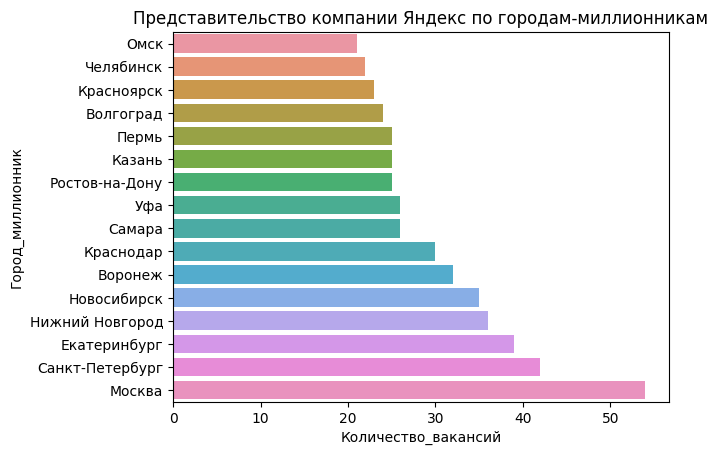

In [78]:
#Выведем график количества вакансий компании Яндекс в городах-миллиониках
sns.barplot(df.iloc[:16],x='Количество_вакансий',y='Город_миллионник').set(title='Представительство компании Яндекс по городам-миллионникам')


In [82]:
print('Общее количество вакансий в компании Яндекс в городах- миллиониках - {}'.format(df['Количество_вакансий'].iloc[16]))

Общее количество вакансий в компании Яндекс в городах- миллиониках - 485


***

# Выводы по анализу работодателей
- ***Больше всего вакансий на сайт hh.ru выкладывает компания "Яндекс", широко представлена как в городах-миллиониках, так и в остальных городах***
- ***Количество работодателей, которые не указывают сферу деятельности 8419, что дастоточно много и должно затрутруднить анализ.***
- ***У компаний могут быть несколько сфер деятельности***  

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [83]:
# текст запроса
query_6_1 = f'''SELECT COUNT(v.id) AS количество_вакансий from vacancies as v
WHERE lower(name) like '%данн%' or lower(name) like '%data%' '''

In [84]:
# результат запроса
df = pd.read_sql_query(query_6_1,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\1520672217.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1,connection)


,количество_вакансий
0,1771


In [86]:
print('Количество вакансий, имеющих отношения к данным составляет {}'.format(df['количество_вакансий'].iloc[0]))

Количество вакансий, имеющих отношения к данным составляет 1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [87]:
# текст запроса
query_6_2 =f'''SELECT count(id) as количество_вакансий FROM vacancies 
WHERE (name ilike '%data science%' or name ilike '%data scientist%' or name ilike '%ml%' or name ilike '%machine learning%' or name ilike '%машинн%обучен%') and name not ilike '%html%' and (employment ='Стажировка' or experience = 'Нет опыта' or name ~*'junior') '''

In [88]:
# результат запроса
df = pd.read_sql_query(query_6_2,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\1041952921.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2,connection)


,количество_вакансий
0,51


In [90]:
print('Подходящих вакансий для начинающих специалистов Data-Science составляет {}'.format(df['количество_вакансий'].iloc[0]))

Подходящих вакансий для начинающих специалистов Data-Science составляет 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [91]:
# текст запроса
query_6_3 = f'''select count(*)
                from vacancies
                where (name ilike '%data scientist%' or
name ilike '%data science%' or
name ilike '%исследователь данных%' or
name like '%ML%' and 
name not ilike '%HTML%' or
name ilike '%machine learning%' or
name ilike '%машинн%обучен%') and
(key_skills ilike '%postgres%' or
key_skills ilike '%SQL%') '''

In [92]:
# результат запроса
df = pd.read_sql_query(query_6_3,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\3683206453.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3,connection)


,count
0,201


In [94]:
print('Вакансий, в которых в качестве ключевого навыка указан SQL или postgres составляет {}'.format(df['count'].iloc[0]))

Вакансий, в которых в качестве ключевого навыка указан SQL или postgres составляет 201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [95]:
# текст запроса
query_6_4 = f'''select count(*)
                from vacancies
                where (name ilike '%data scientist%' or
name ilike '%data science%' or
name ilike '%исследователь данных%' or
name like '%ML%' and 
name not ilike '%HTML%' or
name ilike '%machine learning%' or
name ilike '%машинн%обучен%') and
(key_skills ilike '%python%') '''

In [96]:
# результат запроса
df = pd.read_sql_query(query_6_4,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\3924223682.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4,connection)


,count
0,351


In [97]:
print('количество вакансий, в которых в качестве ключевого навыка указан Python {}'.format(df['count'].iloc[0]))

количество вакансий, в которых в качестве ключевого навыка указан Python 351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [99]:
# текст запроса
query_6_5 = f'''select round(avg(length(key_skills) - length(replace(key_skills,CHR(9),''))+1),2) as Количество
                from vacancies
                where key_skills is not null and (name ilike '%data scientist%' or
name ilike '%data science%' or
name ilike '%исследователь данных%' or
name like '%ML%' and 
name not ilike '%HTML%' or
name ilike '%machine learning%' or
name ilike '%машинн%обучен%') '''

In [100]:
# результат запроса
df = pd.read_sql_query(query_6_5,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\965758319.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5,connection)


,Количество
0,6.41


In [101]:
print('ключевых навыков в среднем указывают в вакансиях для DS {}'.format(df['Количество'].iloc[0]))

ключевых навыков в среднем указывают в вакансиях для DS 6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [102]:
# текст запроса
query_6_6 = f'''select distinct experience AS Опыт,
round(AVG(coalesce((salary_from+salary_to)/2,salary_from,salary_to))) AS Средняя_зарплата
from vacancies 
where (salary_from is not null or
salary_to is not null) and
(name ilike '%data scientist%' or
name ilike '%data science%' or
name ilike '%исследователь данных%' or
(name like '%ML%' and 
name not ilike '%HTML%') or
name ilike '%machine learning%' or
name ilike '%машинн%обучен%')
group by 1 '''

In [103]:
# результат запроса
df = pd.read_sql_query(query_6_6,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\943827912.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6,connection)


,Опыт,Средняя_зарплата
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


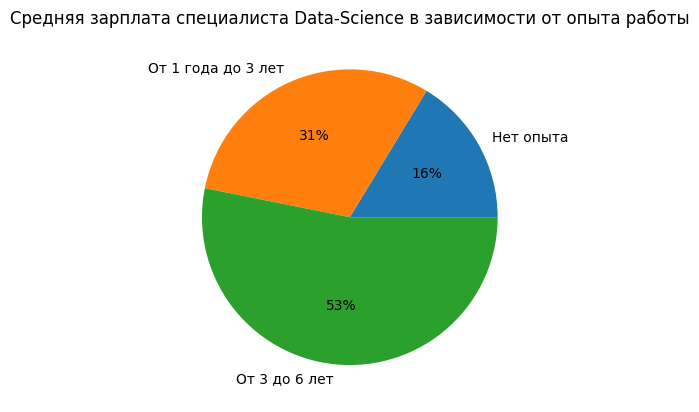

In [104]:
#По графику видно, что для соискателей, у которых опыт работы от 3 до 6 лет, указывают самую высокую зарплату
plt.pie(data =df,x='Средняя_зарплата',  labels='Опыт',autopct='%.0f%%')
plt.title('Средняя зарплата специалиста Data-Science в зависимости от опыта работы')
plt.show()

In [105]:
print('дата-сайентист с опытом работы от 3 до 6 лет в среднем может рассчитывать на зарплату {}'.format(df['Средняя_зарплата'].iloc[2]))

дата-сайентист с опытом работы от 3 до 6 лет в среднем может рассчитывать на зарплату 243115.0


***

# Выводы по предметному анализу
- ***Из 49197 вакансий 1771 вакансия имеет отношение к данным***
- ***Количество вакансий для начинающих дата-сайентистов - 51, что является явно не большим количеством***
- ***Python чуть более востребован чем SQL среди профессиональных навыков у дата -сайентистов***
- ***Работодатели чаще не указывают заработную плату для соискателей***
- ***С опытом работы увеличивается зарплата***

# Общий вывод по проекту

1.  ***Работодатели, в большинстве случаев не указывают размер заработной платы***  
2.  ***Большинство вакансий рассчитаны на опыт работы от 1 до 3 лет***
3.  ***Чаще всего работодателям нужны работники на полный рабочий день и на полную занятость***
4.  ***Лидеры по количеству вакансий Москва и Санкт-Петербург, за ними следуют города миллионики***
5.  ***Начинающие специалисты Data-Science не очень востребованы на рынке труда***
6. ***Для опытных специалистов Data-Science заработная плата выше***
7. ***Среди ключевых навыков работодатели чаще указывают Python, немногим уступает SQL***

***Все исследования, касающиеся Data-Science, применимы ко всем остальным вакансиям во всех сферах деятельности, поскольку в Москве и Санкт-Петербурге больше вакансий, а также заработная плата, за счет этого происходит внутренняя миграция в данные регионы со всех остальных городов. Касаемо работодателей, во всех сферах деятельности, в целях успешной конкуренции между собой, каждый хочет видеть на должностях, на полный рабочий день, опытных сотрудников, владеющих широким спектром специальных профессиональных навыков, поэтому готовы платить высокие заработные платы***

# Дополнительные исследования

Для полноты исследования хотелось бы понять, в каких компаниях и в каких сферах деятельности наиболее востребованы специалисты Data-Science

In [107]:
#выведем топ-10 компаний, где больше всего открытых вакансий на должности DS
dop_query_1 = f'''select e.name, count(v.id) as Количество from employers as e
JOIN vacancies as v on e.id = v.employer_id
where v.name ilike '%data scientist%' or
v.name ilike '%data science%' or
v.name ilike '%исследователь данных%' or
(v.name like '%ML%' and 
v.name not ilike '%HTML%') or
v.name ilike '%machine learning%' or
v.name ilike '%машинн%обучен%'
GROUP BY e.id
ORDER BY 2 DESC
LIMIT 10'''

In [108]:
df = pd.read_sql_query(dop_query_1,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\1688137093.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(dop_query_1,connection)


,name,Количество
0,СБЕР,37
1,Bell Integrator,25
2,Банк ВТБ (ПАО),18
3,VK,15
4,Positive Technologies,11
5,EvenBet Gaming,9
6,Яндекс,9
7,МегаФон,8
8,Andersen,7
9,МТС,6


Text(0.5, 1.0, 'ТОП-10 работодателей публикующие вакансии по Data-Science')

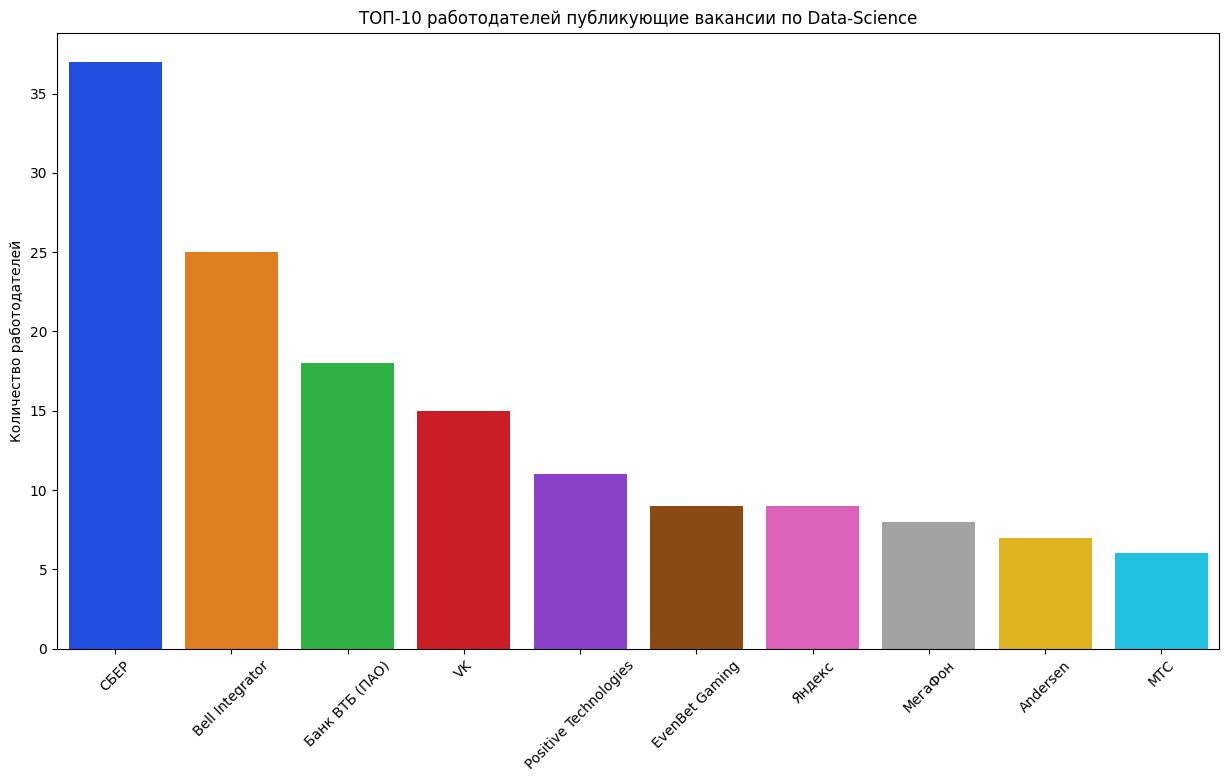

In [109]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'name', y = 'Количество',data = df,palette='bright')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Количество работодателей')
plt.title('ТОП-10 работодателей публикующие вакансии по Data-Science')

### Выводы:
***Больше всего открытых вакансий на специалиста Data-Science в таких компаниях, как (СБЕР, Bell Integrator, Банк ВТБ (ПАО), VK,Positive Technologies,EvenBet Gaming, Яндекс, МегаФон, Andersen, Ozon).Больше всего в СБЕРе - 37 вакансий, далее Bell Integrator -25, Банк ВТБ (ПАО) - 18, VK - 15. Яндекс, где больше всего открытых вакансий, ищет соискателей на должность DS по 9 открытым вакансиям.***

In [110]:
dop_query_2 = f'''select i.name AS Сфера_деятельности, count(v.id) AS Количество from employers as e
JOIN vacancies as v on e.id = v.employer_id
JOIN employers_industries as e_i on e.id = e_i.employer_id
JOIN industries as i on e_i.industry_id = i.id
where v.name ilike '%data scientist%' or
v.name ilike '%data science%' or
v.name ilike '%исследователь данных%' or
(v.name like '%ML%' and 
v.name not ilike '%HTML%') or
v.name ilike '%machine learning%' or
v.name ilike '%машинн%обучен%'
GROUP BY i.id
ORDER BY 2 DESC
LIMIT 10'''


In [111]:
df = pd.read_sql_query(dop_query_2,connection)
df

C:\Users\Насим\AppData\Local\Temp\ipykernel_29192\3634088117.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(dop_query_2,connection)


,Сфера_деятельности,Количество
0,Разработка программного обеспечения,148
1,"Системная интеграция, автоматизации технологи...",139
2,Банк,92
3,"Интернет-компания (поисковики, платежные систе...",79
4,Мобильная связь,23
5,"Маркетинговые, рекламные, BTL, дизайнерские, E...",22
6,"Управляющая, инвестиционная компания (управлен...",21
7,Консалтинговые услуги,16
8,Фиксированная связь,13
9,"Научно-исследовательская, научная, академическ...",9


### Выводы:
***Специалисты Data-Science больше всего нужны в таких сферах деятельности, как:*** 
 - ***разработка программного обеспечения*** 
 - ***ИТ - сфера***
 - ***Бизнес-сфера***
 - ***Банки***
 - ***Мобильная связь***

In [112]:
connection.close()